# WinsPredictor
*Sham Ruthirapragas*

In [30]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

## Data Preparation: Reading, Cleaning, and Organizing
In this section, we read and clean the data by loading it from CSV files, selecting relevant columns, sorting the data, and resetting the index for further analysis.

In [31]:
# Reading and concatenating CSV files into a single DataFrame
data = pd.concat(map(pd.read_csv, glob.glob(os.path.join("datasets/", "*"))), ignore_index=True)

# Cleaning the data by selecting specific columns
data = data[['country', 'season', 'wins', 'goals_scored_per_match', 'goal_difference']]

# Sorting the data by 'country' and 'season' columns
data = data.sort_values(by = ['country', 'season'])

# Resetting the index of the DataFrame after sorting
data = data.reset_index(drop = True)

# Printing the cleaned data to verify the result
print(data)

       country  season  wins  goals_scored_per_match  goal_difference
0      Algeria    2010     0                    0.00               -2
1      Algeria    2014     1                    1.75                0
2       Angola    2006     0                    0.33               -1
3    Argentina    2002     1                    0.67                0
4    Argentina    2006     3                    2.20                8
..         ...     ...   ...                     ...              ...
187    Uruguay    2010     3                    1.57                3
188    Uruguay    2014     2                    1.00               -2
189    Uruguay    2018     4                    1.40                4
190    Uruguay    2022     1                    0.67                0
191      Wales    2022     0                    0.33               -5

[192 rows x 5 columns]


## Calculating Correlations between Target and Predictors
To understand the strength and direction of the relationships between the target variable (`target`) and the predictor variables (`goals_scored_per_match` and `goal_difference`), we calculate the correlation coefficients.

In [32]:
# Defining the target variable
target = 'wins'

# Defining the predictor variables
predictors = ['goals_scored_per_match', 'goal_difference']

# Calculating and printing the correlation between the target and the predictors
print(data.corr(numeric_only = True)[target][predictors])

goals_scored_per_match    0.669760
goal_difference           0.837049
Name: wins, dtype: float64


## Visualizing Relationships between Predictors and Wins
This section visualizes the relationships between the target variable, `wins`, and two predictor variables: `goal_difference` and `goals_scored_per_match`. We use scatter plots with linear regression lines to illustrate how these predictors correlate with the target variable.

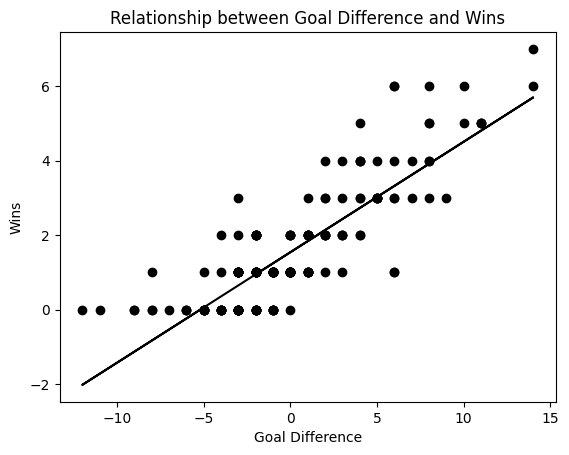

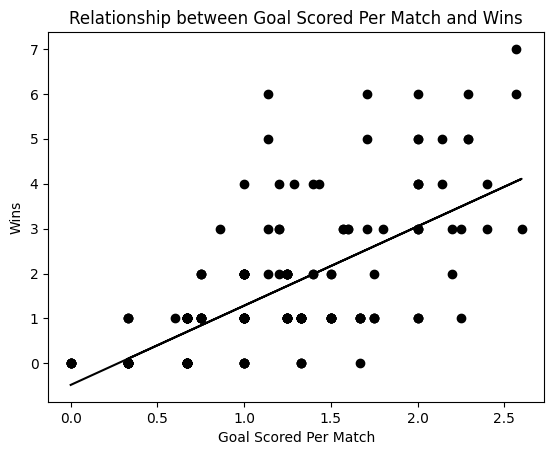

In [33]:
# Plotting the data points for Goal Difference
plt.plot(data['goal_difference'], data[target], 'o', color ='black')

# Fitting a linear regression line to the data
m, b = np.polyfit(data['goal_difference'], data[target], 1)

# Plotting the data and the regression line
plt.plot(data['goal_difference'], m * data['goal_difference'] + b, color = 'black')

# Adding labels and title
plt.xlabel('Goal Difference')
plt.ylabel('Wins')
plt.title('Relationship between Goal Difference and Wins')
plt.show()


# Plotting the data points for Goals Scored Per Match
plt.plot(data['goals_scored_per_match'], data[target], 'o', color ='black')

# Fitting a linear regression line to the data
m, b = np.polyfit(data['goals_scored_per_match'], data[target], 1)

# Plotting the data and the regression line
plt.plot(data['goals_scored_per_match'], m * data['goals_scored_per_match'] + b, color = 'black')

# Adding labels and title
plt.xlabel('Goal Scored Per Match')
plt.ylabel('Wins')
plt.title('Relationship between Goal Scored Per Match and Wins')
plt.show()

## Preparing the Model: Splitting Data and Training
In this section, we prepare the data for model training and testing. We split the data into training and test sets based on the season to create a time-based partition and train the linear regression model.

In [34]:
# Setting up the test data by selecting rows where the season is 2018 or later
testModel = data[data['season'] >= 2018].copy()

# Setting up the training data by selecting rows where the season is before 2018
trainModel = data[data['season'] < 2018].copy()

# Initializing the Linear Regression model
linearReg = LinearRegression()

# Fitting the linear regression model to the training data
linearReg.fit(trainModel[predictors], trainModel[target])

LinearRegression()

## Generating and Refining Predictions
In this section, we use the trained linear regression model to generate predictions for the test dataset and ensure that these predictions are realistic and appropriate for the context of the problem.

In [35]:
# Adding predictions to the test data using the trained linear regression model
testModel['predictions'] = linearReg.predict(testModel[predictors])

# Ensuring that predictions do not go below 0
testModel.loc[testModel["predictions"] < 0, "predictions"] = 0

# Rounding the predictions to the nearest integer since wins can only be of integer type
testModel['predictions'] = testModel['predictions'].round()

# Displaying the test data with the added 'predictions' column
testModel

,country,season,wins,goals_scored_per_match,goal_difference,predictions
7,Argentina,2018,1,1.50,-3,1.0
8,Argentina,2022,4,2.14,7,4.0
12,Australia,2018,0,0.67,-3,1.0
13,Australia,2022,2,1.00,-2,1.0
16,Belgium,2018,6,2.29,10,5.0
...,...,...,...,...,...,...
178,Tunisia,2022,1,0.33,0,1.0
184,USA,2022,1,0.75,-1,1.0
189,Uruguay,2018,4,1.40,4,3.0
190,Uruguay,2022,1,0.67,0,1.0


## Calculating the Mean Absolute Error (MAE)

In this step, we calculate the MAE for our `testModel` DataFrame by comparing the actual `target` values to the `predictions` made by the linear regression model. The result is printed, rounded to three decimal places.

In [36]:
# Calculating the Mean Absolute Error (MAE) between actual and predicted values
meanAbsoluteError = mean_absolute_error(testModel[target], testModel['predictions'])

# Printing the MAE, rounded to three decimal places
print(f'The mean absolute error is: {meanAbsoluteError.round(3)}')

The mean absolute error is: 0.547
